<a href="https://colab.research.google.com/github/madicodes231/Homework1/blob/main/Homework4EDIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**15.2**

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
import matplotlib.gridspec as gridspec


from sklearn.datasets import load_breast_cancer

cancer= load_breast_cancer()

In [2]:
print(cancer.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
cancer.target[::100]

array([0, 0, 1, 0, 0, 1])

In [4]:
cancer.data.shape

(569, 30)

In [119]:
cancer.target.shape

(569,)

In [14]:
cancer.data[13]

array([1.585e+01, 2.395e+01, 1.037e+02, 7.827e+02, 8.401e-02, 1.002e-01,
       9.938e-02, 5.364e-02, 1.847e-01, 5.338e-02, 4.033e-01, 1.078e+00,
       2.903e+00, 3.658e+01, 9.769e-03, 3.126e-02, 5.051e-02, 1.992e-02,
       2.981e-02, 3.002e-03, 1.684e+01, 2.766e+01, 1.120e+02, 8.765e+02,
       1.131e-01, 1.924e-01, 2.322e-01, 1.119e-01, 2.809e-01, 6.287e-02])

In [122]:
cancer.target[22]

0

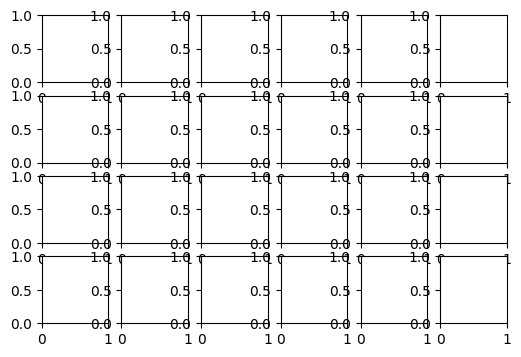

In [17]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=11)

In [34]:
X_train.shape

(426, 30)

In [35]:
X_test.shape

(143, 30)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [38]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [39]:
predicted = knn.predict(X=X_test)

expected = y_test

In [40]:
predicted[:20]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [41]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [45]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

wrong

[(1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)]

In [46]:
print(f'{(len(expected) - len(wrong)) / len(expected):.2%}')

94.41%


In [49]:
wrong = []

for p, e in zip(predicted, expected):
     if p != e:
        wrong.append((p, e))

wrong

[(1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)]

**15.3**

In [51]:
print(f'{knn.score(X_test, y_test):.2%}')

94.41%


In [52]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [53]:
confusion

array([[43,  7],
       [ 1, 92]])

In [54]:
from sklearn.metrics import classification_report
names = [str(cancer) for cancer in cancer.target_names]

In [56]:
print(classification_report(expected, predicted,
      target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.86      0.91        50
      benign       0.93      0.99      0.96        93

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143



In [57]:
import pandas as pd

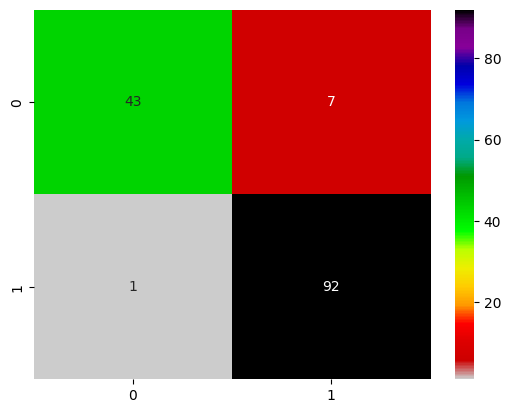

In [118]:
confusion_df = pd.DataFrame(confusion, index=range(2),
   columns=range(2))


import seaborn as sns

axes = sns.heatmap(confusion_df, annot=True,
                     cmap='nipy_spectral_r')



In [81]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [94]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=knn, X=cancer.data,
    y=cancer.target, cv=kfold)

In [87]:
scores

array([0.92982456, 0.94736842, 0.89473684, 0.92982456, 0.92982456,
       0.94736842, 0.89473684, 0.94736842, 0.94736842, 0.91071429])

In [88]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 92.79%


In [90]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 2.01%


In [98]:
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

In [99]:
estimators = {'GaussianNB': knn,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')}



In [101]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
       X=cancer.data, y=cancer.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
          f'mean accuracy={scores.mean():.2%} ' +
          f'standard deviation={scores.std():.2%}')

          GaussianNB: mean accuracy=92.79% standard deviation=2.01%
KNeighborsClassifier: mean accuracy=92.79% standard deviation=2.01%
  LogisticRegression: mean accuracy=95.08% standard deviation=3.02%
                 SVC: mean accuracy=91.92% standard deviation=3.52%


In [104]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
         X=cancer.data, y=cancer.target, cv=kfold)
print(f'k={k:<2}; mean accuracy={scores.mean():.2%}: ' +
      f'standard deviation={scores.std():.2%}')

k=19; mean accuracy=92.79%: standard deviation=3.37%
